In [1]:
# Import important libs.
import numpy as np
import pandas as pd
import sys
import os

# Add the parent directory of 'notebooks' to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))

from src.utils import draw_box_plot, draw_corr, draw_count_plot_to_churn, draw_dist_and_kde, visualize_imbalance_churn

In [2]:
# Read in the data
df = pd.read_csv("/home/yushi/code/churn_broadcasting/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Gather info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# We need to change the TotalCharges to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# Gather summary statistics about the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


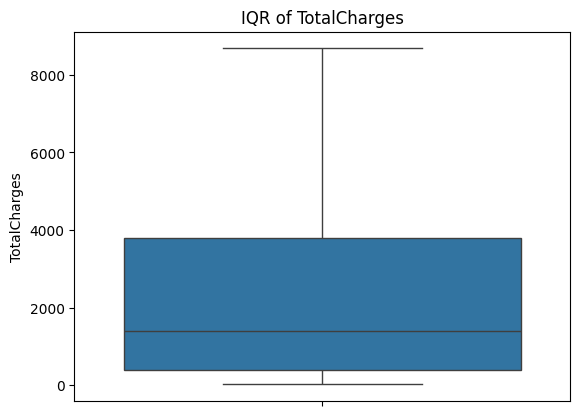

In [7]:
# We need to visualize the IQR of the MonthlyCharges, TotalCharges and tenure columns
draw_box_plot(df, "TotalCharges", "../figures/total_charges_box_plot.png")

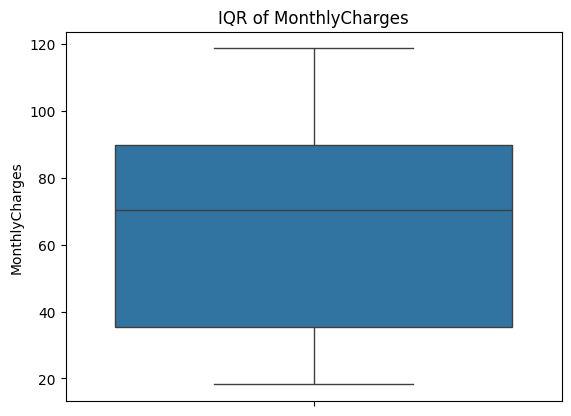

In [8]:
draw_box_plot(df, "MonthlyCharges", "../figures/monthly_charges_box_plot.png")

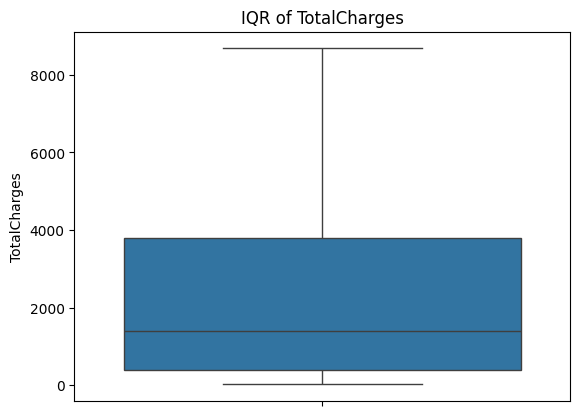

In [9]:
draw_box_plot(df, "TotalCharges", "../figures/total_charges_box_plot.png")

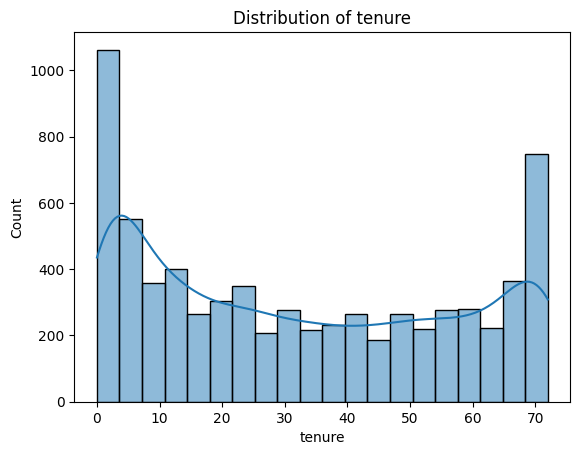

In [10]:
# Plot the distribution of the MonthlyCharges, TotalCharges and tenure columns and compare them to the normal distribution
draw_dist_and_kde(df, "tenure", "../figures/tenure_histogram.png")

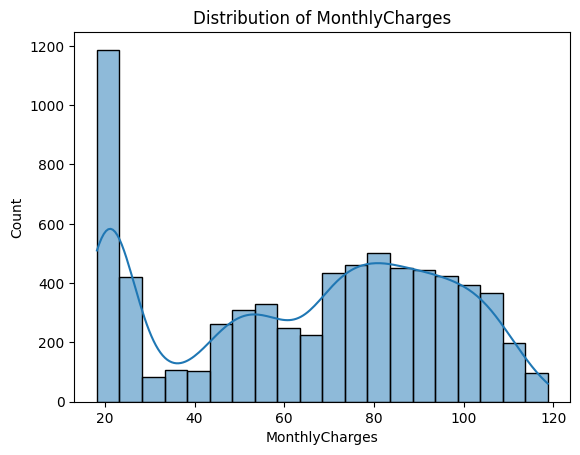

In [11]:
draw_dist_and_kde(df, "MonthlyCharges", "../figures/monthly_charges_histogram.png")

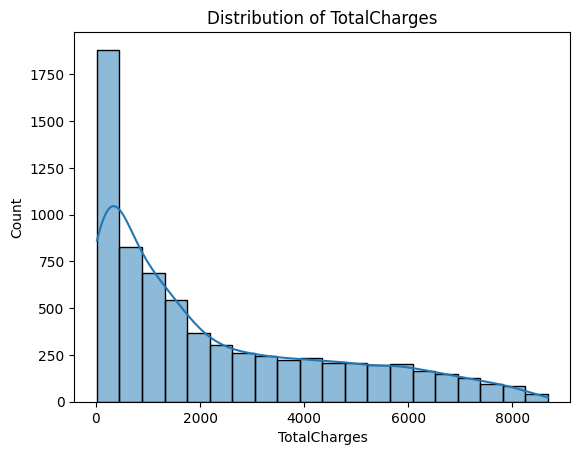

In [12]:
draw_dist_and_kde(df, "TotalCharges", "../figures/total_charges_histogram.png")

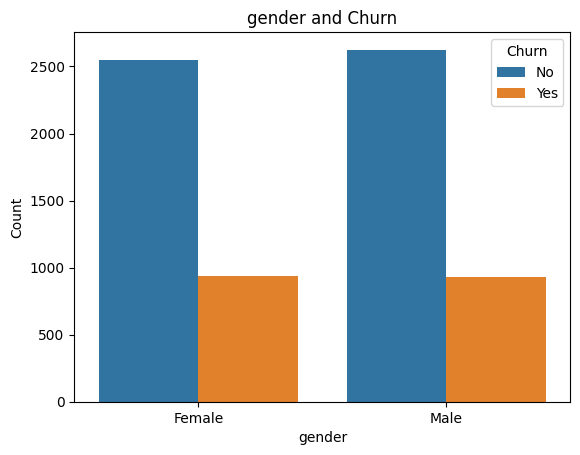

In [13]:
# Now that we know that that data is not normal and the TotalCharges is left-skeweed
# Now we need to plot the relation between the gender and churn
draw_count_plot_to_churn(df, "gender", "../figures/gender_churn.png")

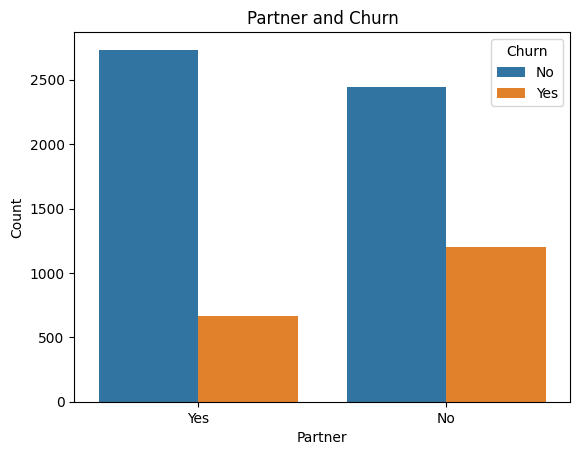

In [14]:
# Now we find out that there is very low corelation between the gender and churn
# Now we find out is there a corelation between partner and churn
draw_count_plot_to_churn(df, "Partner", "../figures/partner_churn.png")

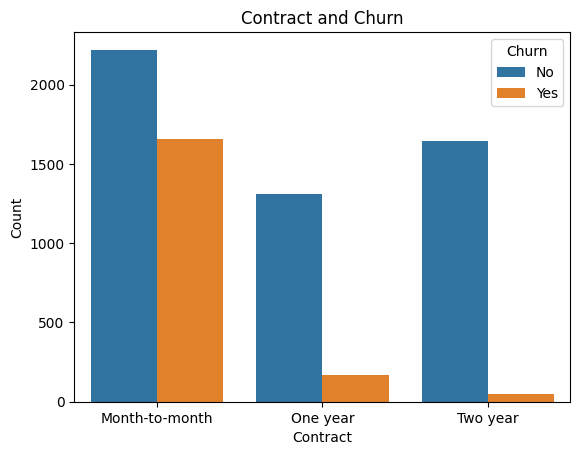

In [15]:
# So there is some relationship between the if the customer has a partner or not and the churn, so if you have don't have a partner you are more likely to churn
# Now we need to check if the Contract type is related to the churn
draw_count_plot_to_churn(df, "Contract", "../figures/contract_churn.png")

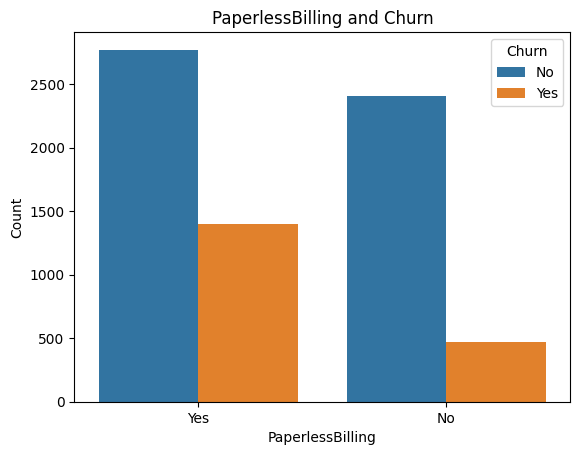

In [16]:
# So we found out that it's related pretty much.
# let's see the relation between the PaperlessBilling and churn.
draw_count_plot_to_churn(df, "PaperlessBilling", "../figures/billing_churn.png")

In [17]:
services_and_churn = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]

df[services_and_churn]

,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No,Yes,No,No,No,No,No
1,Yes,Yes,No,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No,No,No,Yes
3,No,Yes,No,Yes,Yes,No,No,No
4,Yes,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...
7038,Yes,Yes,No,Yes,Yes,Yes,Yes,No
7039,Yes,No,Yes,Yes,No,Yes,Yes,No
7040,No,Yes,No,No,No,No,No,No
7041,Yes,No,No,No,No,No,No,Yes


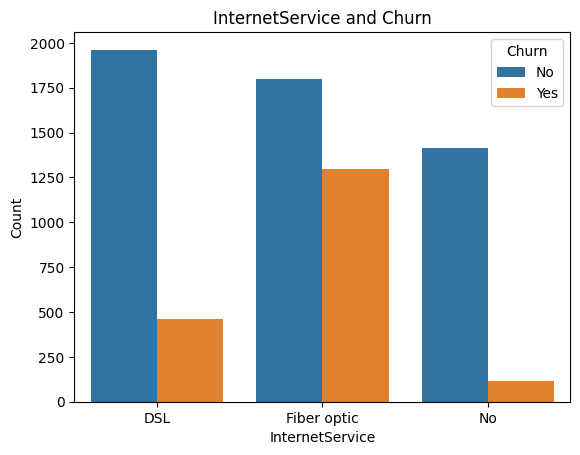

In [18]:
# So we can find out that those services don't make a significant contribution to the user decision.
# we need to invistigate about the internet service
draw_count_plot_to_churn(df, "InternetService", "../figures/internet_service_churn.png")

In [19]:
# So we know that the internet service will affect the choice
# Now we need to know only the relation between the seniorcitizen and dependents so I can finish EDA.
print(df['SeniorCitizen'].unique())
print(df['Dependents'].unique())

[0 1]
['No' 'Yes']


In [20]:
df['Dependents'] = df['Dependents'].map({"No": False, "Yes": True}).astype(int)
print(df['Dependents'].unique())

[0 1]


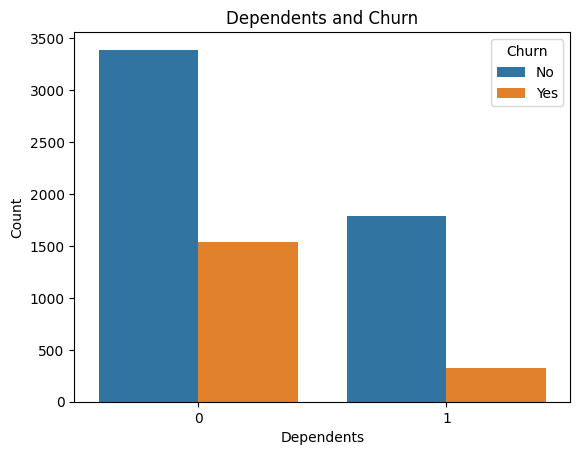

In [21]:
draw_count_plot_to_churn(df, "Dependents", "../figures/dependents_churn.png")

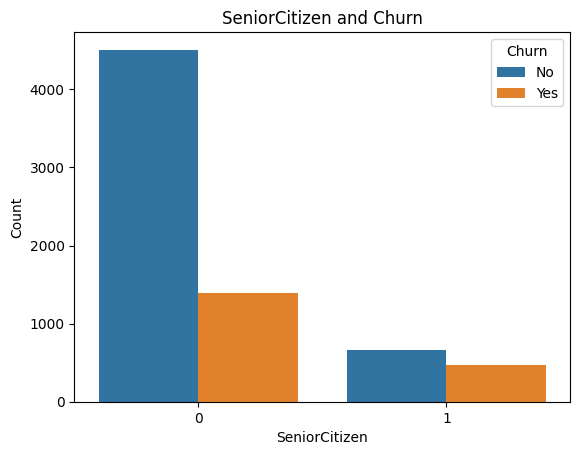

In [22]:
draw_count_plot_to_churn(df, "SeniorCitizen", "../figures/senior_citizen_churn.png")

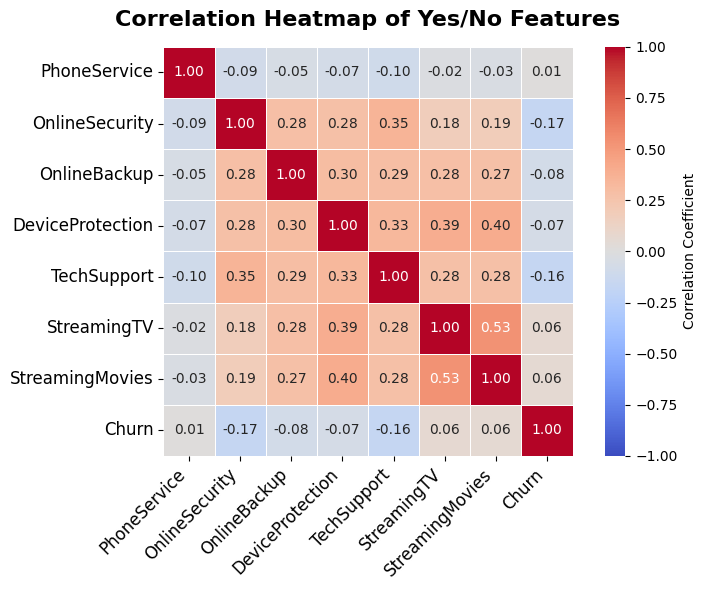

In [23]:
# So paperless billings leads to more churn.
# We need to find the corelation between each service in the bill and the churn.
services_and_churn = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]
draw_corr(df, services_and_churn, "../figures/service_to_churn_correlation_heatmap.png")

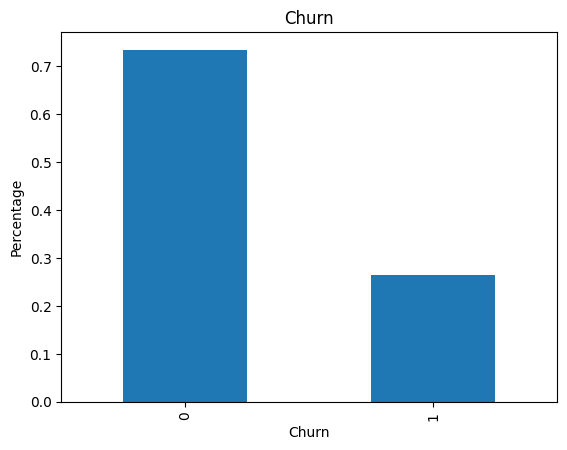

In [24]:
visualize_imbalance_churn(df)

In [25]:
# So after EDA we can see that the most important features are:

# 1. SeniorCitizen
# 2. Dependents
# 3. InternetService
# 4. Contract
# 5. PaperlessBilling
# 6. partner
# 7. tenure
# 8. MonthlyCharges
# 9. TotalCharges

# Now we can remove the remained features
features = ['SeniorCitizen', 'Dependents', 'InternetService', 'Contract', 'PaperlessBilling', 'Partner', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

df = df[features]

df

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,Partner,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,DSL,Month-to-month,Yes,Yes,1,29.85,29.85,0
1,0,0,DSL,One year,No,No,34,56.95,1889.50,0
2,0,0,DSL,Month-to-month,Yes,No,2,53.85,108.15,1
3,0,0,DSL,One year,No,No,45,42.30,1840.75,0
4,0,0,Fiber optic,Month-to-month,Yes,No,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,DSL,One year,Yes,Yes,24,84.80,1990.50,0
7039,0,1,Fiber optic,One year,Yes,Yes,72,103.20,7362.90,0
7040,0,1,DSL,Month-to-month,Yes,Yes,11,29.60,346.45,0
7041,1,0,Fiber optic,Month-to-month,Yes,Yes,4,74.40,306.60,1


In [26]:
# We can do some preprocessing here as we make the partner and paperless billing into int
df['Partner'] = df['Partner'].map({"Yes": True, "No": False}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map({"Yes": True, "No": False}).astype(int)

In [27]:
df

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,Partner,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,DSL,Month-to-month,1,1,1,29.85,29.85,0
1,0,0,DSL,One year,0,0,34,56.95,1889.50,0
2,0,0,DSL,Month-to-month,1,0,2,53.85,108.15,1
3,0,0,DSL,One year,0,0,45,42.30,1840.75,0
4,0,0,Fiber optic,Month-to-month,1,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,DSL,One year,1,1,24,84.80,1990.50,0
7039,0,1,Fiber optic,One year,1,1,72,103.20,7362.90,0
7040,0,1,DSL,Month-to-month,1,1,11,29.60,346.45,0
7041,1,0,Fiber optic,Month-to-month,1,1,4,74.40,306.60,1


In [28]:
df.to_csv('../data/preprocessed/after_eda_data.csv', index=False)